In [1]:
# carregar bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn import datasets
from sklearn import metrics, model_selection
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
# carregar os dados
iris = datasets.load_iris()

X, y = shuffle(iris.data, iris.target)

#para análise
df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


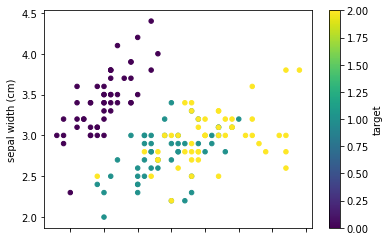

In [5]:
df.plot.scatter(
    x="sepal length (cm)",
    y="sepal width (cm)",
    c="target",
    colormap='viridis'
)

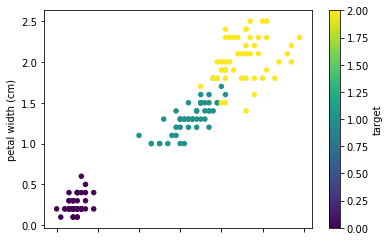

In [7]:
df.plot.scatter(
    x="petal length (cm)",
    y="petal width (cm)",
    c="target",
    colormap='viridis'
)

In [12]:
cls = make_pipeline(StandardScaler(), SVC(C=10))
cls.fit(X, y)
mae = metrics.accuracy_score(y, cls.predict(X)) * 100
print("Taxa de acerto     : {:.2f}%".format(mae))

score = model_selection.cross_val_score(cls, X, y, cv=10)
print("Taxa de acerto (CV): {:.2f}%".format(np.mean(score) * 100))

Taxa de acerto     : 98.67%
Taxa de acerto (CV): 96.67%
